In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 120
import matplotlib as mpl

In [2]:
dataset_material = pd.read_excel('Data_Ghiringhelli.xlsx', 'Material Data')
dataset_atomic = pd.read_excel('Data_Ghiringhelli.xlsx','Atomic Data')

### Calculated energy difference between RS and ZB of 82 structures

In [3]:
def spliting_zb_and_rs(dataset):
    dataset_zb1 = dataset[dataset['Classification']=='ZB1']
    dataset_zb2 = dataset[dataset['Classification']=='ZB2']
    dataset_zb3 = dataset[dataset['Classification']=='ZB3']
    dataset_zb = pd.concat([dataset_zb1,dataset_zb2,dataset_zb3])

    dataset_rs1 = dataset[dataset['Classification']=='RS1']
    dataset_rs2 = dataset[dataset['Classification']=='RS2']
    dataset_rs3 = dataset[dataset['Classification']=='RS3']
    dataset_rs = pd.concat([dataset_rs1,dataset_rs2,dataset_rs3])
    
    dataset_N = dataset[dataset['Classification']=='N']
    return dataset_zb, dataset_rs, dataset_N

In [4]:
import matplotlib.pyplot as plt
from matplotlib  import cm
import numpy as np
#---------------------------------

cmap_blue = mpl.cm.Blues(np.linspace(0,1,20))
cmap_blue = mpl.colors.ListedColormap(cmap_blue[10:,:-1])

cmap_red = mpl.cm.Reds(np.linspace(0,1,20))
cmap_red = mpl.colors.ListedColormap(cmap_red[10:,:-1])

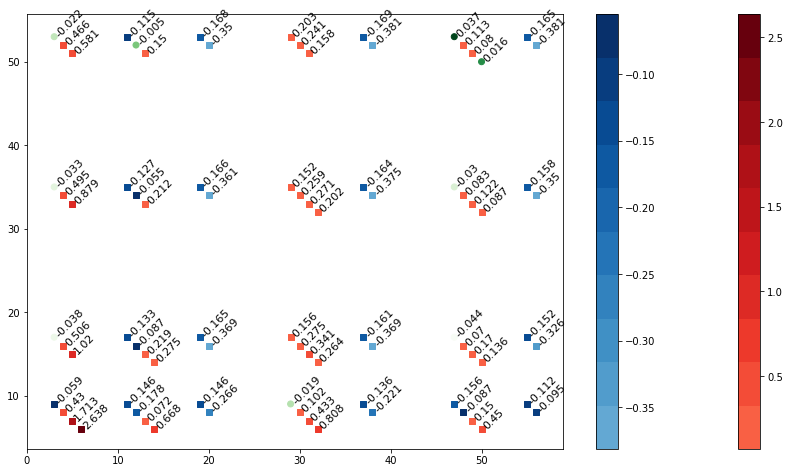

In [5]:
dataset_zb, dataset_rs, dataset_n = spliting_zb_and_rs(dataset=dataset_material)
#---------------------------------

x,y,z = dataset_material['ZA'].values, dataset_material['ZB'].values, dataset_material['DE']
x_zb, y_zb, z_zb = dataset_zb['ZA'].values, dataset_zb['ZB'].values, dataset_zb['DE'].values
x_rs, y_rs, z_rs = dataset_rs['ZA'].values, dataset_rs['ZB'].values, dataset_rs['DE'].values
x_n, y_n, z_n    = dataset_n['ZA'].values, dataset_n['ZB'].values, dataset_n['DE'].values
#----------------------------------

fig, ax = plt.subplots(figsize=(15,8))
im = ax.scatter(x_zb, y_zb, c=z_zb,  cmap=cmap_red, marker = 's')
fig.colorbar(im, ax=ax)
im = ax.scatter(x_rs, y_rs, c=z_rs,  cmap=cmap_blue, marker = 's')
fig.colorbar(im, ax=ax)
im = ax.scatter(x_n, y_n, c=z_n, marker = 'o', cmap=mpl.cm.Greens)
#---------------------------------

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]), size=11, rotation=45)
    
plt.show()

### Prediction using 2D descriptor

In [6]:
def get_row(element,dataframe):
    return (dataframe.loc[dataframe['A']==element])

def collecting_para(a,b, dataframe):
    raw_a = get_row(element=a, dataframe=dataframe)
    raw_b = get_row(element=b, dataframe=dataframe)
    
    X_loc = np.abs(raw_a['rs'].values-raw_b['rp'].values) * np.exp(-raw_a['rs'].values)
    Y_loc = np.abs(raw_b['IP'].values-raw_b['EA'].values) / (raw_a['rp'].values)**2
    
    return X_loc[0], Y_loc[0]

In [7]:
len(dataset_material['A'].values)

82

In [8]:
datadict = dict()
datadict['X'] = []
datadict['Y'] = []
datadict['Z'] = []
datadict['A'] = []
datadict['B'] = []

for index, row in dataset_material.iterrows():
    try:
        x_loc, y_loc = collecting_para(a=row['A'], b=row['B'], dataframe=dataset_atomic)
            
        datadict['Z'].append(row['DE'])
        datadict['X'].append(x_loc)
        datadict['Y'].append(y_loc)
        datadict['A'].append(row['A'])
        datadict['B'].append(row['B'])
        
    except:
        print(row['A'],row['B'])
        pass

Be S
B N
B P
B As
Mg S
Ca S
Zn S
Sr S
Cd S
B Sb
Ba S


In [9]:
dataframe_2D = pd.DataFrame(datadict)

(0, 8)

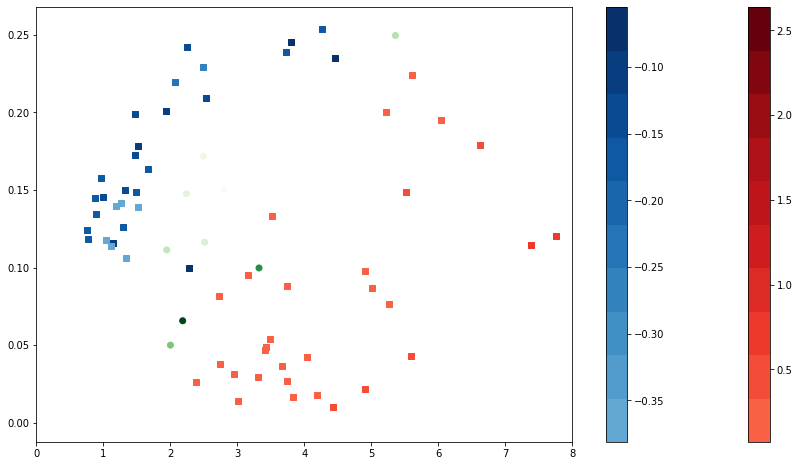

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
im = ax.scatter(dataframe_2D[dataframe_2D['Z']>0.05]['Y'], 
                dataframe_2D[dataframe_2D['Z']>0.05]['X'], 
                c = dataframe_2D[dataframe_2D['Z']>0.05]['Z'],  cmap=cmap_red, marker = 's')
fig.colorbar(im, ax=ax)
im = ax.scatter(dataframe_2D[dataframe_2D['Z']<-0.05]['Y'], 
                dataframe_2D[dataframe_2D['Z']<-0.05]['X'], 
                c = dataframe_2D[dataframe_2D['Z']<-0.05]['Z'],  cmap=cmap_blue, marker = 's')
fig.colorbar(im, ax=ax)

im = ax.scatter(dataframe_2D[(dataframe_2D['Z']>-0.05) & (dataframe_2D['Z']<0.05)]['Y'], 
                dataframe_2D[(dataframe_2D['Z']>-0.05) & (dataframe_2D['Z']<0.05)]['X'], 
                c = dataframe_2D[(dataframe_2D['Z']>-0.05) & (dataframe_2D['Z']<0.05)]['Z'],  marker = 'o', cmap=mpl.cm.Greens)


plt.xlim(0,8)

### Trying with all the possible combination

In [11]:
datadict_all = dict()
datadict_all['X'] = []
datadict_all['Y'] = []

for index_1, row_1 in dataset_atomic.iterrows():
    for index_2, row_2 in dataset_atomic.iterrows():
        if row_1['A'] != row_2['A'] :
            try:
                x_loc, y_loc = collecting_para(a=row_1['A'], b=row_2['A'], dataframe=dataset_atomic)

                datadict_all['X'].append(x_loc)
                datadict_all['Y'].append(y_loc)

            except:
                #print(row['A'],row['B'])
                pass


In [12]:
pd_all_2D = pd.DataFrame(datadict_all)
a = np.empty(len(pd_all_2D['X']))
a.fill(0.1)
pd_all_2D['Z'] = pd.Series(a, index=pd_all_2D.index)

(0, 8)

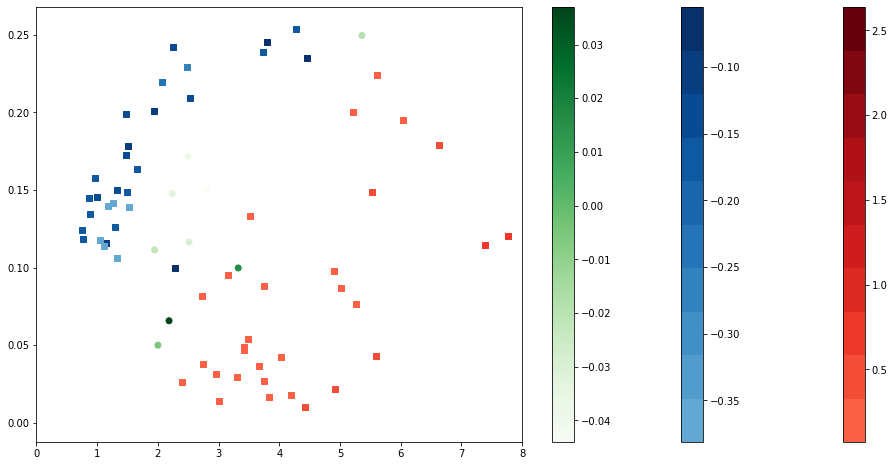

In [13]:
fig, ax = plt.subplots(figsize=(17,8))



im = ax.scatter(dataframe_2D[dataframe_2D['Z']>0.05]['Y'], 
                dataframe_2D[dataframe_2D['Z']>0.05]['X'], 
                c = dataframe_2D[dataframe_2D['Z']>0.05]['Z'],  cmap=cmap_red, marker = 's')
fig.colorbar(im, ax=ax)
im = ax.scatter(dataframe_2D[dataframe_2D['Z']<-0.05]['Y'], 
                dataframe_2D[dataframe_2D['Z']<-0.05]['X'], 
                c = dataframe_2D[dataframe_2D['Z']<-0.05]['Z'],  cmap=cmap_blue, marker = 's')
fig.colorbar(im, ax=ax)

im = ax.scatter(dataframe_2D[(dataframe_2D['Z']>-0.05) & (dataframe_2D['Z']<0.05)]['Y'], 
                dataframe_2D[(dataframe_2D['Z']>-0.05) & (dataframe_2D['Z']<0.05)]['X'], 
                c = dataframe_2D[(dataframe_2D['Z']>-0.05) & (dataframe_2D['Z']<0.05)]['Z'],  
                marker = 'o', cmap=mpl.cm.Greens)

#im = ax.scatter(pd_all_2D['Y'], pd_all_2D['X'],c = pd_all_2D['Z'], marker = '.', cmap = mpl.cm.Greys)
fig.colorbar(im, ax=ax)


plt.xlim(0,8)
#plt.ylim(0,0.25)

### Linear Regression

In [14]:
Zb = (dataframe_2D[dataframe_2D['Z']>0.05])
Rs = (dataframe_2D[dataframe_2D['Z']<-0.05])
Ns = (dataframe_2D[(dataframe_2D['Z']>-0.05) & (dataframe_2D['Z']<0.05)])
Zb = Zb.drop(Zb.index[(Zb['A']=='C')&(Zb['B']=='C')])
all_frames = [Zb,Rs,Ns]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

prediction_array = []

for classification in all_frames:
    X = classification.iloc[:,:1].values
    y = classification.iloc[:,1].values
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.0001, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    temp = []
    temp.append(X_train)
    temp.append(y_train)
    temp.append(regressor.predict(X_train))
    prediction_array.append(temp)
    

(0, 8)

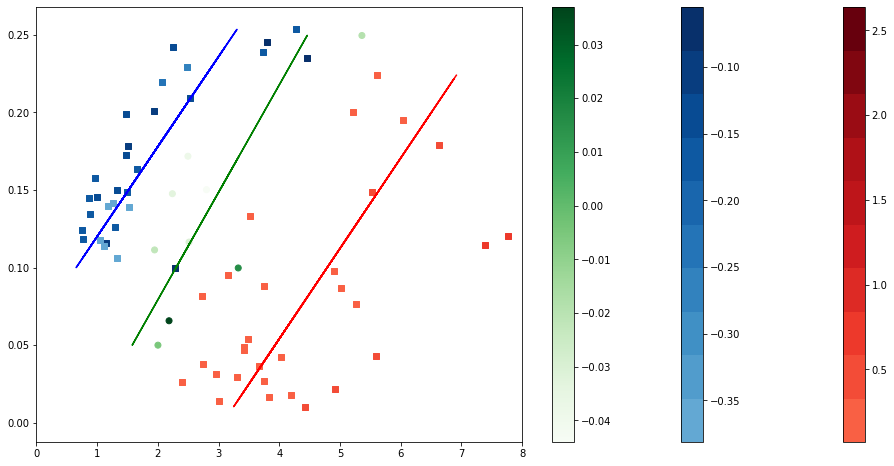

In [16]:
fig, ax = plt.subplots(figsize=(17,8))



im = ax.scatter(dataframe_2D[dataframe_2D['Z']>0.05]['Y'], 
                dataframe_2D[dataframe_2D['Z']>0.05]['X'], 
                c = dataframe_2D[dataframe_2D['Z']>0.05]['Z'],  cmap=cmap_red, marker = 's')
ax.plot(prediction_array[0][2], prediction_array[0][0], color='red')

fig.colorbar(im, ax=ax)
im = ax.scatter(dataframe_2D[dataframe_2D['Z']<-0.05]['Y'], 
                dataframe_2D[dataframe_2D['Z']<-0.05]['X'], 
                c = dataframe_2D[dataframe_2D['Z']<-0.05]['Z'],  cmap=cmap_blue, marker = 's')
ax.plot(prediction_array[1][2], prediction_array[1][0], color='blue')
fig.colorbar(im, ax=ax)

im = ax.scatter(dataframe_2D[(dataframe_2D['Z']>-0.05) & (dataframe_2D['Z']<0.05)]['Y'], 
                dataframe_2D[(dataframe_2D['Z']>-0.05) & (dataframe_2D['Z']<0.05)]['X'], 
                c = dataframe_2D[(dataframe_2D['Z']>-0.05) & (dataframe_2D['Z']<0.05)]['Z'],  
                marker = 'o', cmap=mpl.cm.Greens)
ax.plot(prediction_array[2][2], prediction_array[2][0], color='green')

#im = ax.scatter(pd_all_2D['Y'], pd_all_2D['X'],c = pd_all_2D['Z'], marker = '.', cmap = mpl.cm.Greys)
fig.colorbar(im, ax=ax)


plt.xlim(0,8)
#plt.ylim(0,0.25)